## 1.데이터 둘러보기

In [2]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (5,041 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128276 files and di

In [1]:
#기본 패키지 불러오기
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic') #한글 폰트 가져오기
plt.rcParams['font.family'] = 'NanumGothic'


import warnings #경고 메세지 무시하기
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#구글 드라이브 마운트하기
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#데이터 불러오기
#구글 드라이브에 올려준 csv 데이터 파일 불러오기
lol = pd.read_excel('/content/drive/MyDrive/data/2023 개인 프로젝트 데이터/League of Legend/League of Legends Champion Stats 13.3.xlsx')

In [9]:
lol.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,53.65,0,0.4817,0.9275,0.0514,0.0660,1.85
1,Ahri,Mage,MID,S,55.93,0,0.4989,0.9041,0.0901,0.0254,2.61
2,Akali,Assassin,MID,A,50.75,0,0.4829,0.7188,0.0691,0.1101,2.36
3,Akali,Assassin,TOP,C,40.63,0,0.4595,0.2715,0.0254,0.1101,1.99
4,Akshan,Marksman,MID,A,50.47,0,0.5167,0.6515,0.0248,0.0347,2.27
5,Akshan,Marksman,TOP,B,44.88,0,0.5137,0.2604,0.0099,0.0347,1.99
6,Alistar,Tank,SUPPORT,B,47.31,0,0.4950,0.8158,0.0370,0.0088,2.44
7,Alistar,Tank,TOP,D,25.48,0,0.4253,0.1193,0.0052,0.0088,1.99
8,Amumu,Tank,JUNGLE,S,60.24,0,0.5197,0.5891,0.0516,0.0803,2.69
9,Amumu,Tank,SUPPORT,A,48.88,0,0.5187,0.4021,0.0307,0.0803,2.11


In [10]:
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    241 non-null    object 
 1   Class   240 non-null    object 
 2   Role    241 non-null    object 
 3   Tier    241 non-null    object 
 4   Score   241 non-null    float64
 5   Trend   241 non-null    int64  
 6   Win %   241 non-null    float64
 7   Role %  241 non-null    float64
 8   Pick %  241 non-null    float64
 9   Ban %   241 non-null    float64
 10  KDA     241 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 20.8+ KB


In [12]:
lol.describe()

,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
count,241.000000,241.0,241.000000,241.000000,241.000000,241.000000,241.000000
mean,49.999793,0.0,0.500047,0.628932,0.039400,0.054937,2.330581
std,13.064614,0.0,0.018995,0.318073,0.036228,0.074288,0.395055
min,10.550000,0.0,0.417100,0.101300,0.001500,0.001300,1.420000
25%,43.620000,0.0,0.490600,0.276700,0.013500,0.008800,2.040000
50%,48.550000,0.0,0.501600,0.747000,0.030800,0.026300,2.320000
75%,54.780000,0.0,0.512200,0.911500,0.053000,0.065500,2.560000
max,96.360000,0.0,0.554900,0.995900,0.215800,0.513800,3.640000


In [13]:
lol.describe(include = np.object_)

,Name,Class,Role,Tier
count,241,240,241,241
unique,162,6,5,6
top,Yasuo,Fighter,TOP,A
freq,3,68,61,60


In [16]:
# 범주형 데이터 컬럼 내용 확인
print(lol['Name'].unique())
print(lol['Class'].unique())
print(lol['Role'].unique())
print(lol['Tier'].unique())
# 범주가 적으면 범주 별 그래프를 그리기 쉽다 -> Class, Role, Tier를 활용하면 좋을 것 같다.

['Aatrox' 'Ahri' 'Akali' 'Akshan' 'Alistar' 'Amumu' 'Anivia' 'Annie'
 'Aphelios' 'Ashe' 'Aurelion Sol' 'Azir' 'Bard' "Bel'Veth" 'Blitzcrank'
 'Brand' 'Braum' 'Caitlyn' 'Camille' 'Cassiopeia' "Cho'Gath" 'Corki'
 'Darius' 'Diana' 'Dr. Mundo' 'Draven' 'Ekko' 'Elise' 'Evelynn' 'Ezreal'
 'Fiddlesticks' 'Fiora' 'Fizz' 'Galio' 'Gangplank' 'Garen' 'Gnar' 'Gragas'
 'Graves' 'Gwen' 'Hecarim' 'Heimerdinger' 'Illaoi' 'Irelia' 'Ivern'
 'Janna' 'Jarvan IV' 'Jax' 'Jayce' 'Jhin' 'Jinx' "K'Sante" "Kai'Sa"
 'Kalista' 'Karma' 'Karthus' 'Kassadin' 'Katarina' 'Kayle' 'Kayn' 'Kennen'
 "Kha'Zix" 'Kindred' 'Kled' "Kog'Maw" 'LeBlanc' 'Lee Sin' 'Leona' 'Lillia'
 'Lissandra' 'Lucian' 'Lulu' 'Lux' 'Malphite' 'Malzahar' 'Maokai'
 'Master Yi' 'Miss Fortune' 'Mordekaiser' 'Morgana' 'Nami' 'Nasus'
 'Nautilus' 'Neeko' 'Nidalee' 'Nilah' 'Nocturne' 'Nunu' 'Olaf' 'Orianna'
 'Ornn' 'Pantheon' 'Poppy' 'Pyke' 'Qiyana' 'Quinn' 'Rakan' 'Rammus'
 "Rek'Sai" 'Rell' 'Renata Glasc' 'Renekton' 'Rengar' 'Riven' 'Rumble'
 'Ryze' 'Sam

In [4]:
#데이터 내용 간단히 정리해서 출력하기
print("총 데이터 개수: ", lol.shape[0]*lol.shape[1])
print("총 결측치 수: {} = 전체 데이터의 {:.2f}% ".format(lol.isnull().sum().sum(), (lol.isnull().sum().sum()*100)/(lol.shape[0]*lol.shape[1])))
print("League of Legend에 존재하는 챔피언 수: ", lol['Name'].nunique())
print("League of Legend 챔피언 특성 수: ", lol['Class'].nunique())

총 데이터 개수:  2651
총 결측치 수: 1 = 전체 데이터의 0.04% 
League of Legend에 존재하는 챔피언 수:  162
League of Legend 챔피언 특성 수:  6


## 2. 데이터 정비하기

### 2-1. 결측치 처리하기

In [5]:
lol.isnull().any(axis = 0)

Name      False
Class      True
Role      False
Tier      False
Score     False
Trend     False
Win %     False
Role %    False
Pick %    False
Ban %     False
KDA       False
dtype: bool

In [6]:
lol.isnull().sum()

Name      0
Class     1
Role      0
Tier      0
Score     0
Trend     0
Win %     0
Role %    0
Pick %    0
Ban %     0
KDA       0
dtype: int64

In [12]:
lol[lol['Class'].isnull()]

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
72,K'Sante,NaN,TOP,B,45.23,0,0.4544,0.9198,0.0432,0.0829,1.82


In [13]:
lol['Class'].fillna('Tank', inplace = True)

## 3. EDA & Visualization

### 3-1. League of Legend 챔피언의 포지션 비율

In [15]:
lol['Role'].value_counts()

TOP        61
MID        59
SUPPORT    48
JUNGLE     47
ADC        26
Name: Role, dtype: int64

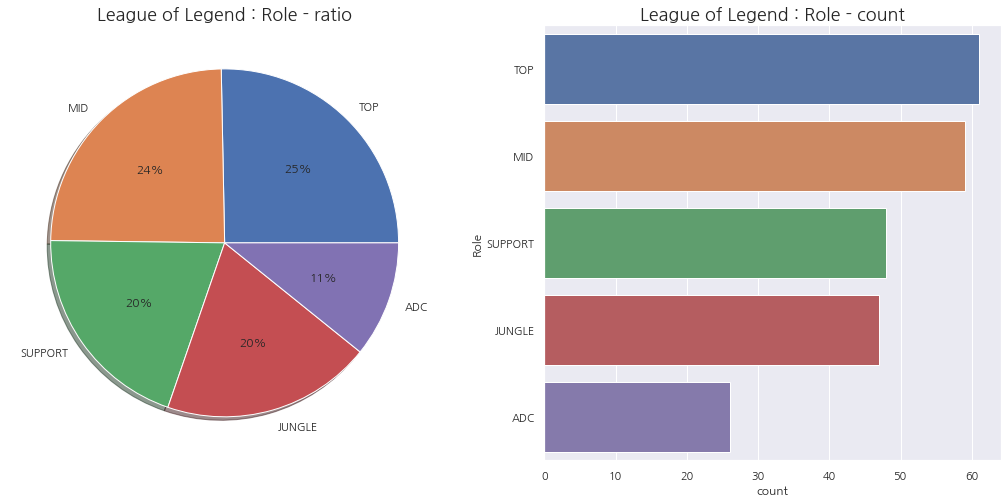

In [18]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

lol['Role'].value_counts().plot.pie(ax = ax[0], autopct = '%1.0f%%', shadow = True)
ax[0].set_title('League of Legend : Role - ratio', size = 18)
ax[0].set_ylabel('')

sns.countplot(data = lol, y='Role', ax = ax[1])
ax[1].set_title('League of Legend : Role - count', size = 18)

plt.show()

### 3-2 League of Legend 챔피언의 포지션에 따른 총점 분포

In [19]:
lol['KDA'].describe()

count    241.000000
mean       2.330581
std        0.395055
min        1.420000
25%        2.040000
50%        2.320000
75%        2.560000
max        3.640000
Name: KDA, dtype: float64

In [20]:
print('Skewness : %f' % lol['KDA'].skew())
print('Kurosis : %f' % lol['KDA'].kurt())

Skewness : 0.476325
Kurosis : 0.283996


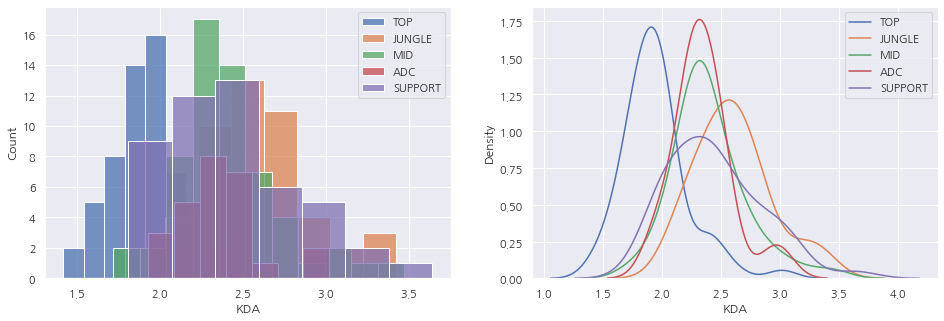

In [60]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))

sns.histplot(lol[lol['Role'] == 'TOP']['KDA'], ax = ax[0], label = 'TOP')
sns.histplot(lol[lol['Role'] == 'JUNGLE']['KDA'], ax = ax[0], label = 'JUNGLE')
sns.histplot(lol[lol['Role'] == 'MID']['KDA'], ax = ax[0], label = 'MID')
sns.histplot(lol[lol['Role'] == 'ADC']['KDA'], ax = ax[0], label = 'ADC')
sns.histplot(lol[lol['Role'] == 'SUPPORT']['KDA'], ax = ax[0], label = 'SUPPORT')
ax[0].legend()


sns.kdeplot(lol[lol['Role'] == 'TOP']['KDA'], ax = ax[1])
sns.kdeplot(lol[lol['Role'] == 'JUNGLE']['KDA'], ax = ax[1])
sns.kdeplot(lol[lol['Role'] == 'MID']['KDA'], ax = ax[1])
sns.kdeplot(lol[lol['Role'] == 'ADC']['KDA'], ax = ax[1])
sns.kdeplot(lol[lol['Role'] == 'SUPPORT']['KDA'], ax = ax[1])
ax[1].legend(['TOP','JUNGLE','MID','ADC','SUPPORT'])

plt.show()

### 3-3. 가장 승률이 좋은 챔피언과 가장 승률이 안 좋은 챔피언

In [77]:
#데이터 내용 정리해서 출력하기
print("{} - {}의 승률이 {} (으)로 가장 낮다.".format(lol[lol['Win %'] == min(lol['Win %'])]['Name'].values, lol[lol['Win %'] == min(lol['Win %'])]['Role'].values,  min(lol['Win %'])))
print("{} - {}의 승률이 {} (으)로 가장 높다.".format(lol[lol['Win %'] == max(lol['Win %'])]['Name'].values, lol[lol['Win %'] == max(lol['Win %'])]['Role'].values,  max(lol['Win %'])))

['Qiyana'] - ['JUNGLE']의 승률이 0.4171 (으)로 가장 낮다.
['Annie'] - ['SUPPORT']의 승률이 0.5549 (으)로 가장 높다.


### 3-4. 챔피언의 역할 군 간 승률 비교

In [78]:
win_ratio = lol[['Class', 'Win %']].groupby(['Class'], as_index = True).mean()
win_ratio

,Win %
Class,
Assassin,0.485577
Fighter,0.501915
Mage,0.502541
Marksman,0.500826
Support,0.494789
Tank,0.505353


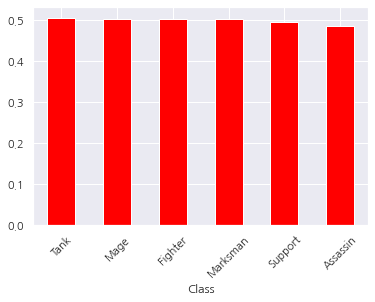

In [80]:
win_ratio['Win %'].sort_values(ascending = False).plot.bar(color = 'red')

plt.xticks(rotation = 45)
plt.show()

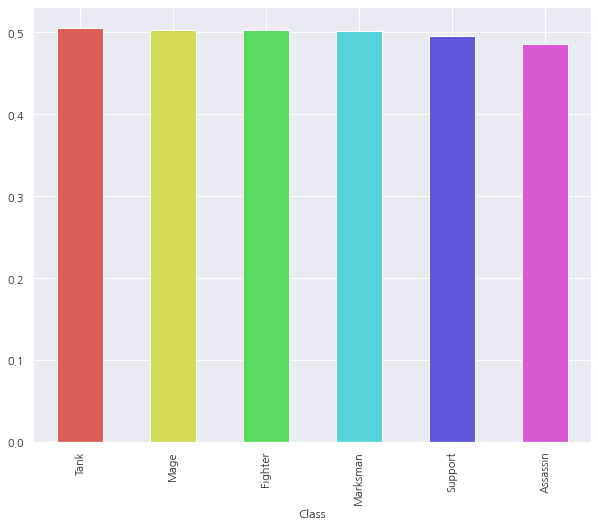

In [82]:
f, ax = plt.subplots(1, 1, figsize = (10, 8))

colors = sns.color_palette('hls', len(win_ratio['Win %']))

g = win_ratio['Win %'].sort_values(ascending = False).plot.bar(color = colors)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)

plt.show()

### 3-5 League of Legend 챔피언의 KDA-승률 상관관계

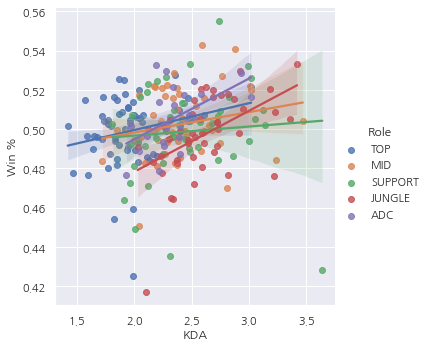

In [83]:
sns.lmplot(data = lol, x = 'KDA', y = 'Win %', hue = 'Role')
sns.set_style(style = 'darkgrid')

plt.show()